손지우

### Part 2. HW  
**1) Part 1의 code를 수정해서 (Strong likelihood, Weak likelihood) $\times$ (Uninformative prior, Weak prior, Strong prior)의 6가지 경우 비교해보기**  
  
  
**2) BDA 1.3 Exercise**  
Suppose that in each individual of a large population there is a pair of genes, each of which can be either x of X, that controls eye color: those with xx have blue eyes, while heterozygotes (those with Xx or xX) and those with XX have brown eyes. The proportion of blue-eyed individuals is $p^2$ and of heterozygotes is $2p(1-p)$, where $0<p<1$. Each parent transmits one of tis own genes to the child; if a parent is a heterozygote, the probability that it transmits one of its own genes to the child; if a parent is a heterozygotes, the probability that it transmits the gene of type X is $\frac{1}{2}$. Assuming random mating, show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1+2p}$. Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild hs blue eyes. 
  
  
**3) 새로운 대학병원에서의 high risk 수술의 생존율에 관한 분석. 다른 병원에서의 경험을 통해 생존율은 $0.9$ 정도로 예상되며 $0.8$ 미만이거나 $0.97$ 초과일 것 같지는 않다고 생각한다.**   
  
3-a) **Beta** distribution으로 위의 **belief**을 survival rate에 관한 **prior distribution**으로 나타내라. Parameter $\alpha, \beta$는 어떻게 선정하면 좋을 것인가? 
(Hint : 여러분의 믿음의 강도 따라 $\alpha, \beta$의 답이 달라질 수 있다. 하나의 정답을 맞추는 것이 아니라 실생활의 문제를 해석하는 힘을 기르는 것이 취지라 하겠다.)
  
3-b) 이제 **data gathering**. 10명의 환자에 수술을 진행해 모두 생존하였다. survival rate에 관한 **Posterior Distribution** 구하기.  
  
3-c) 다음 환자가 생존할 확률과 다음 20명의 환자 중 2명 이상 사망할 확률을 각각 예측하시오. (Hint : Posterior Predictive)

---

### Library Load

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.pyplot as plt

# 1번 문제

In [2]:
def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

In [3]:
def plotPriorLikelihood(n, y, a0, b0, likelihood_scale=10**4):
    # Likelihood : binomial distribution(n, y)

    # Prior : beta distribution(a0, b0)
    prior = st.beta(a=a0, b=b0)

    # Posterior
    post = st.beta(a=a0+n, b=b0+(n-y))

    # plotting
    thetas = np.linspace(0, 1, 300)
    plt.figure(figsize=(8, 6))
    plt.style.use('ggplot')
    plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
    
    ## 원래는 likelihood 앞에 아무것도 붙이면 안되지만 시각적 확인을 위해 어쩔 수 없이 붙인다.
    plt.plot(thetas, likelihood_scale*likelihood(thetas, n, y), label='Likelihood', c='orange')
    plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
    plt.xlim([-0.10, 1.10])
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel('Density', fontsize=16)
    plt.legend();

#### case1. Strong likelihood & uninformative prior

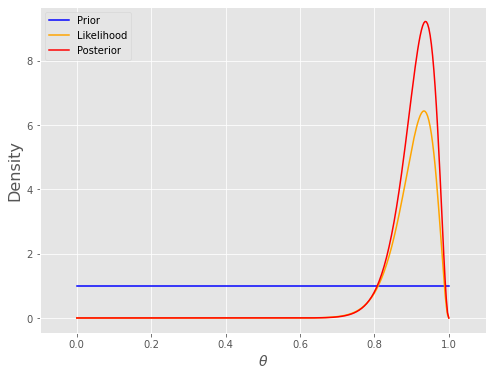

In [4]:
plotPriorLikelihood(n=30, y=28, a0=1, b0=1)

#### case2. Strong likelihood & Weak prior

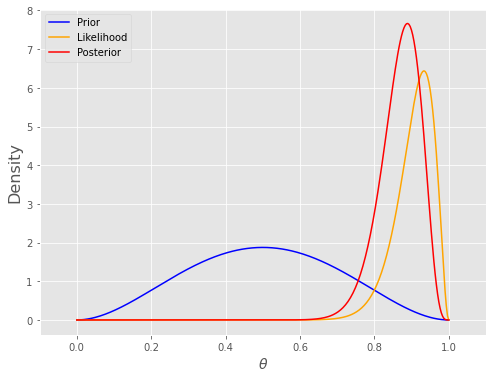

In [5]:
plotPriorLikelihood(n=30, y=28, a0=3, b0=3)

#### case3. Strong likelihood & Strong prior

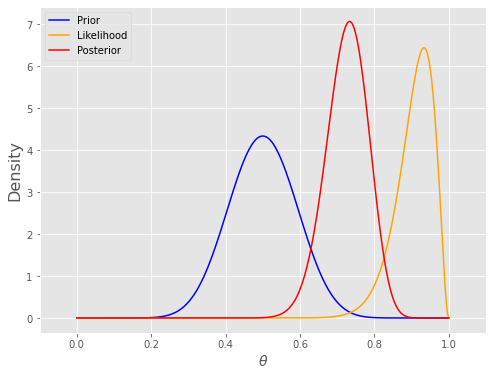

In [6]:
plotPriorLikelihood(n=30, y=28, a0=15, b0=15)

#### case4. Weak likelihood & uninformative prior

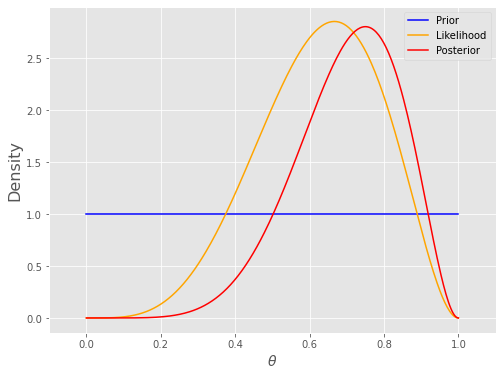

In [7]:
plotPriorLikelihood(n=6, y=4, a0=1, b0=1, likelihood_scale=130)

#### case5. Weak likelihood & Weak prior

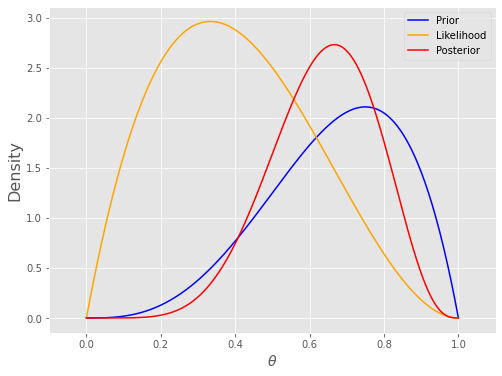

In [8]:
plotPriorLikelihood(n=3, y=1, a0=4, b0=2, likelihood_scale=20)

#### case6. Weak likelihood & Strong prior

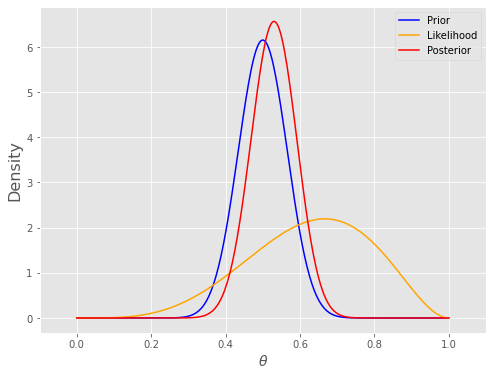

In [9]:
plotPriorLikelihood(n=6, y=4, a0=30, b0=30, likelihood_scale=100)

# 2번 문제

![week1_2](images/week1_2.jpg)

# 3번 문제

![week1_3.png](images/week1_3.PNG)

3-a)  
beta distribution에서 a와 b의 비가 9:1이면 평균은 0.9가 나온다. 이를 바탕으로 0.8미만 또는 0.97초과가 될 확률을 계산해보면 위와 같이 나왔다. **0.8미만 또는 0.97초과가 될 확률이 낮다는 것을 '개인적으로' 0.05 이하로 잡고 싶어서** $\alpha, \beta$를 각각 **45와 5**로 prior의 parameter를 잡았다.

3-b)  
수술 이후의 케이스를 (생존, 사망) 두 가지로 구분하고 각 상황의 확률이 일정하다고 가정하겠다. 그렇다면 이는 binomial distribution을 따른다고 봐도 무방하다. 이는 계산의 편이성을 위해 conjugate한 상황으로 생각하기 위함이다. 그렇다면 posterior distribution은 **beta distribution**을 따를 것이다. 이때의 모수 $\alpha, \beta$ 각각 **55와 5**이다.

3-c)  
다음 환자가 생존할 확률: 약 91.67%
- [설명] 원래는 90%였는데, 이후 10번의 수술이 모두 성공적이었으므로 1.67%p 올라간 것을 확인할 수 있다.
- 참고로, 이처럼 다음번 하나의 시행이 성공할 확률을 계산해보면 **항상 posterior mean과 같다**. (0.91666...= 55/60)

다음 20명의 환자 중 2명 이상이 사망할 확률: 약 47.77%
- [설명] 이는 한 명이 사망할 확률(19명이 생존할 확률)과 0명이 사망할 확률(20명이 생존할 확률)을 더한 후 1에서 빼주면 될 것이다.

![week1_3_c.PNG](images/week1_3_c.PNG)

beta-binomial model에서 posterior predictive distribution을 계산하는 과정은 아래와 같다.  
참고로, 여기서 $n^{*}, y^{*}$은 각각 새로운 표본 수와 성공 수를 뜻한다. 

![images/week1_3.jpg](images/week1_3.jpg)